Tian - 20180925
--

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
%matplotlib inline

/Users/tkg8w58/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Read in train and test data
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [3]:
# Get statistics of train data
train.describe()

,outcome,categorical,numeric
count,195.000000,190.000000,191.000000
mean,0.605128,2.000000,52.178010
std,1.041893,0.690066,8.921868
min,0.000000,1.000000,33.000000
25%,0.000000,2.000000,45.000000
50%,0.000000,2.000000,52.000000
75%,1.000000,2.000000,58.000000
max,6.000000,3.000000,75.000000


In [4]:
# Get the unique values of outcome

train.outcome.unique()

array([0, 1, 3, 2, 5, 4, 6])

In [5]:
# Get the unique values of categorical

train.categorical.unique()

array([  3.,   1.,  nan,   2.])

In [6]:
# Get the unique values of numeric

train.numeric.unique()

array([ 41.,  44.,  nan,  40.,  42.,  46.,  33.,  38.,  37.,  39.,  43.,
        45.,  49.,  47.,  57.,  50.,  52.,  48.,  54.,  53.,  51.,  55.,
        61.,  56.,  35.,  59.,  66.,  58.,  60.,  63.,  64.,  62.,  67.,
        65.,  72.,  69.,  70.,  68.,  75.,  71.])

In [7]:
# Get the number of null values

train.isnull().sum()

outcome        0
categorical    5
numeric        4
dtype: int64

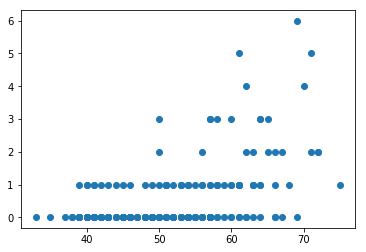

In [8]:
# Explore relationship between numeric and outcome
fig = plt.scatter(train.numeric, train.outcome)
plt.show()

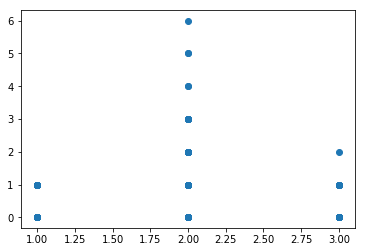

In [9]:
# Explore relationship between categorical and outcome

fig = plt.scatter(train.categorical, train.outcome)
plt.show()

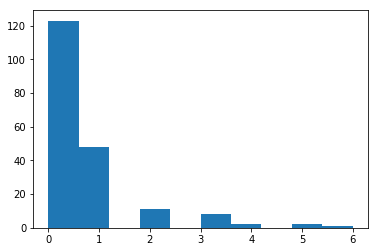

In [10]:
# Explore relationship between categorical and outcome

counts, bins, fig = plt.hist(train.outcome)
plt.show()

In [11]:
# Missing value imputation and feature engineering

train = train.join(pd.get_dummies(train.categorical))
test = test.join(pd.get_dummies(test.categorical))
train.rename(columns={1.0:'X1', 2.0:'X2', 3.0:'X3'}, inplace=True)
test.rename(columns={1.0:'X1', 2.0:'X2', 3.0:'X3'}, inplace=True)

m = train.numeric.median()
train = train.fillna({'numeric':m})

m = test.numeric.median()
test = test.fillna({'numeric':m})

In [12]:
# Model and training

cols = ['numeric', 'X1', 'X2', 'X3']
X = [nums for nums in train[cols].values]
X_test = [nums for nums in test[cols].values]

# Adding constant to adding bias
X = sm.add_constant(X, prepend=False)
X_test = sm.add_constant(X_test, prepend=False)
Y = [nums for nums in train['outcome'].values]

# building the model
model = sm.Poisson(Y, X)
result = model.fit(method="newton")

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.893186
         Iterations 7
                          Poisson Regression Results                          
Dep. Variable:                      y   No. Observations:                  195
Model:                        Poisson   Df Residuals:                      190
Method:                           MLE   Df Model:                            4
Date:                Tue, 25 Sep 2018   Pseudo R-squ.:                  0.2145
Time:                        14:55:40   Log-Likelihood:                -174.17
converged:                       True   LL-Null:                       -221.74
                                        LLR p-value:                 1.063e-19
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0758      0.012      6.502      0.000       0.053       0.099
x2            -1.4829      0.

In [13]:
# Predictions

result.predict(X_test)

array([ 3.72238257,  1.51242595,  3.72238257,  0.91139782,  2.8652503 ])